In [1]:
from datasets.datasets import BaseDataset
from torchvision import transforms

transformers = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64))
])

In [2]:
import numpy as np

bds = BaseDataset(
    root='data/food_data/train',
    transforms=transformers,
    samples_to_normalize=None,
    mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5],
    normalize_data=True
)

In [7]:
bds_modified = BaseDataset(
    root='data/food_data/train',
    transforms=transformers,
    samples_to_normalize=None,
    mean=np.array([0.5, 0.5, 0.5]), std=np.array([0.5, 0.5, 0.5]),
    normalize_data=True
)

In [9]:
bds[0]['images']

tensor([[[ 1.4451,  1.3743,  1.2681,  ..., -1.4570, -1.4393, -1.3862],
         [ 1.2328,  1.1974,  1.1266,  ..., -0.5191, -0.8199, -1.0500],
         [ 1.0204,  1.0204,  0.9850,  ..., -0.2537, -0.1829, -0.1652],
         ...,
         [ 1.1443,  1.2151,  1.2858,  ...,  1.4982,  1.4982,  1.4982],
         [ 1.1974,  1.2328,  1.2681,  ...,  1.5159,  1.5159,  1.5159],
         [ 1.1974,  1.1974,  1.1974,  ...,  1.5159,  1.5159,  1.5159]],

        [[ 1.6361,  1.5683,  1.4665,  ..., -1.7906, -1.8245, -1.7736],
         [ 1.4326,  1.3986,  1.3308,  ..., -0.8745, -1.1629, -1.4004],
         [ 1.2290,  1.2290,  1.1951,  ..., -0.5352, -0.4844, -0.4674],
         ...,
         [ 1.2629,  1.3308,  1.3986,  ...,  1.7379,  1.7379,  1.7379],
         [ 1.2969,  1.3308,  1.3647,  ...,  1.7549,  1.7549,  1.7549],
         [ 1.2969,  1.2969,  1.2969,  ...,  1.7549,  1.7549,  1.7549]],

        [[ 1.9023,  1.8335,  1.7304,  ..., -1.5019, -1.5019, -1.5019],
         [ 1.6960,  1.6616,  1.5928,  ..., -0

(array([ 1.,  1.,  0.,  0.,  1.,  2.,  1.,  0.,  2.,  0.,  1.,  2.,  3.,
         2.,  1.,  2.,  3.,  2.,  0.,  3.,  3.,  5.,  4.,  4., 10.,  8.,
         5.,  6.,  0.,  7.,  3.,  7.,  9.,  8., 10.,  6.,  6.,  0.,  6.,
         3.,  5.,  4.,  3.,  4.,  9.,  3.,  3.,  0.,  4.,  8., 10.,  3.,
         7.,  1., 11.,  7.,  0.,  5.,  5.,  7.,  6.,  8.,  5.,  8.,  6.,
         6.,  0.,  6.,  6.,  7.,  5.,  9., 10.,  3.,  9.,  0.,  9.,  9.,
         2., 12.,  4., 12., 10.,  7., 11.,  0.,  9., 14., 11., 10., 15.,
         8.,  7., 14.,  0., 12.,  9., 15., 11., 11.,  5., 19., 15., 16.,
         0., 15., 15., 17., 12., 12., 16., 10., 16.,  0., 18., 16., 17.,
        13., 12., 15., 16., 10., 11.,  0., 12., 12., 15., 19., 15., 13.,
        11., 11.,  0., 14., 10., 16., 14., 23., 19., 17., 15., 14.,  0.,
        11., 20., 12., 17., 25., 16., 22., 22.,  0., 27., 31., 28., 33.,
        27., 23., 23., 31., 27.,  0., 27., 22., 32., 32., 32., 26., 18.,
        38.,  0., 36., 30., 25., 20., 26., 31., 29.

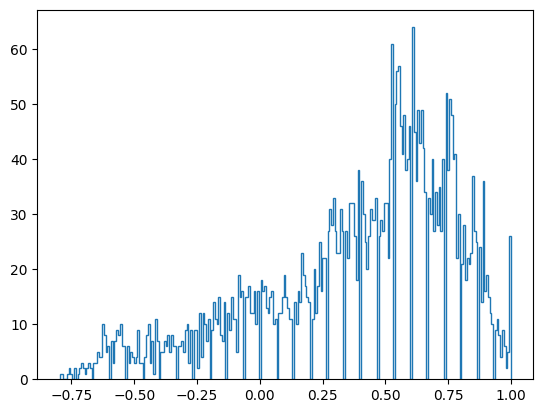

In [3]:
from matplotlib import pyplot as plt
plt.hist(bds[0]['images'][0].ravel(), bins=256, histtype='step')

In [278]:
from matplotlib import pyplot as plt
from training import noise

ns = noise.NoiseScheduler(0.1, 1000)

/var/folders/hk/5434dpv95nl2rxl497d7c0lm0000gn/T/ipykernel_19630/769216580.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.imshow(ns(bds[0]['images'].permute(1, 2, 0), 900) * bds.std + bds.mean)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.7908554e-05..1.0000212].


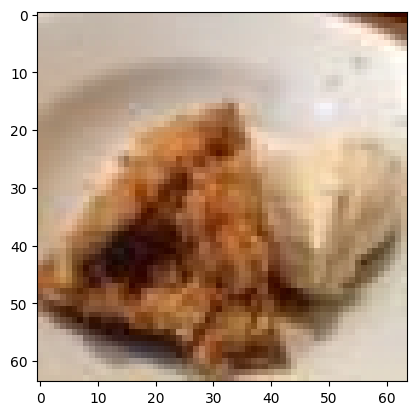

In [107]:
plt.imshow(ns(bds[0]['images'].permute(1, 2, 0), 900) * bds.std + bds.mean)

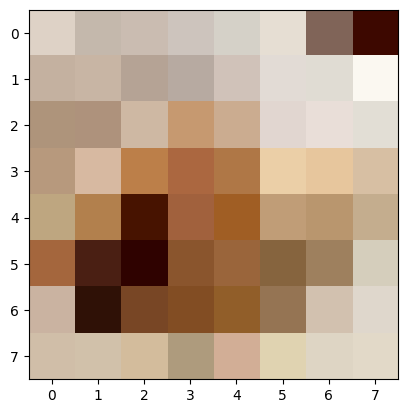

In [281]:
from torch.nn import functional as F
import torch
from math import log

input = bds[0]['images'].unsqueeze(0)
# input = ns(bds[0]['images'], 10).unsqueeze(0)
size = int(input.size(2) / (2 ** 3))
size = (size, size)

plt.imshow(ns(F.interpolate(input, size, mode='bilinear', align_corners=True), 1000).squeeze(0).permute(1, 2, 0).detach().numpy() * bds.std + bds.mean)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0074172914..1.0109874].


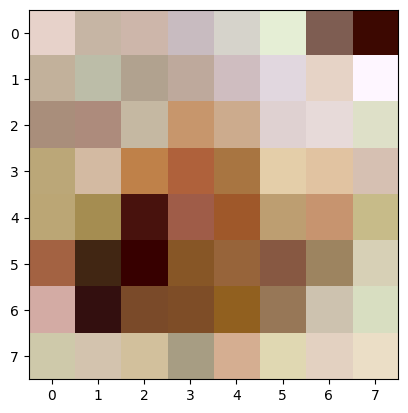

In [290]:
plt.imshow(ns(F.interpolate(input, size, mode='bilinear', align_corners=True), 1).squeeze(0).permute(1, 2, 0).detach().numpy() * bds.std + bds.mean)

In [1]:
from models.gan_models import WasserstainGenerator, WasserstainCritic
from omegaconf import OmegaConf
import torch

config = OmegaConf.create({
    'z_dim': 128,
    'hidden_dim': 512
})

wg = WasserstainGenerator(config)
wc = WasserstainCritic(config)

In [24]:
num_blocks=5
wg.set_num_blocks(num_blocks)
wc.set_num_blocks(num_blocks)
wc(wg(torch.normal(0, 1, (1, 128), device='cpu')))

tensor(0.0339, grad_fn=<SqueezeBackward0>)

In [7]:
wg.block_number

tensor(1)

In [4]:
from training.fade_in import FadeInScheduler
from omegaconf import OmegaConf
import torch

config = OmegaConf.create({
    'lvl_fraction': [0.5, 0.1, 0.1, 0.2, 0.1],
    'start_from': 1
})

fis = FadeInScheduler(300000, config)

In [6]:
from tqdm import tqdm
ks = []
for i in tqdm(range(300000)):
    _, k = fis(torch.normal(0, 1, (3, 3, 64, 64), device='cpu'), i)
    ks.append(k)

  0%|          | 0/300000 [00:00<?, ?it/s]

100%|██████████| 300000/300000 [02:24<00:00, 2079.84it/s]


(array([150000.,      0.,  30000.,      0.,      0.,  30000.,      0.,
         60000.,      0.,  30000.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

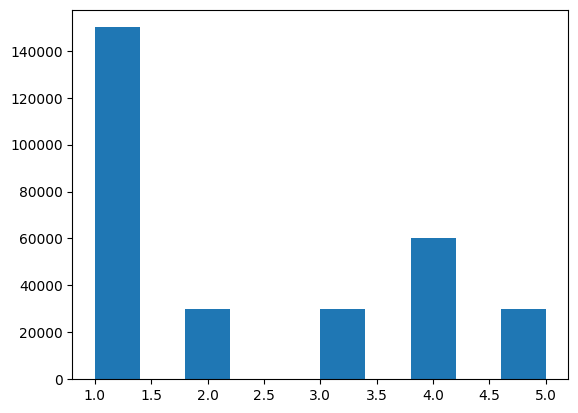

In [7]:
from matplotlib import pyplot as plt
plt.hist(ks)

In [2]:
fis(torch.normal(0, 1, (3, 3, 64, 64), device='cpu'), 0)

(tensor([[[[-1.0906,  0.4119, -0.7750,  0.4693],
           [-0.3465,  0.2120,  1.0050, -0.9589],
           [ 0.0548, -0.6221,  1.3432, -1.0137],
           [-0.5251,  0.1708, -1.0779,  0.8347]],
 
          [[ 2.0891, -0.5095,  0.2201,  0.8418],
           [-1.1826,  1.5177, -0.2353, -0.0411],
           [-0.3922,  1.2493,  1.0612, -1.1562],
           [ 0.3163, -0.3204, -1.1379, -1.0743]],
 
          [[ 0.8276,  0.6131, -0.8035,  1.0268],
           [-2.2075, -0.0541, -1.5817, -2.1291],
           [-0.6421,  2.1659,  1.1974, -0.6697],
           [ 0.5226, -0.1340, -0.2136,  0.5278]]],
 
 
         [[[ 0.1328, -1.9444,  0.7725,  1.6371],
           [ 1.8997,  2.0917, -0.5498, -0.5602],
           [-0.4596,  0.6740,  0.2972, -0.4629],
           [ 1.7110, -0.5254, -1.5955, -0.4160]],
 
          [[ 1.5743, -0.8722, -1.2473, -1.6467],
           [-1.3646, -0.0185, -0.8471,  0.2479],
           [ 0.2702,  1.2933, -0.5234, -0.5178],
           [-1.5107, -1.2274,  0.4502,  0.3784]],
 
  

In [1]:
from training.diffusion_scheduler import DiffusionNoiseScheduler
import numpy as np
from datasets.datasets import BaseDataset
from torch.utils.data.dataloader import DataLoader
from matplotlib import pyplot as plt
from torchvision import transforms
import torch

transformers = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64))
])

bds = BaseDataset(
    root='data/food_data/train',
    transforms=transformers,
    samples_to_normalize=None,
    mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5],
    normalize_data=True
)

dtl = iter(DataLoader(bds, 5))
N = 300
scheduler = DiffusionNoiseScheduler('linear', 1e-5, 2e-2, N)


data = next(dtl)['images']
# scheduler(data, torch.randint(0, 300, (len(data), )))

In [1]:
from models.diffusion_models import BlendingUnet
from omegaconf import OmegaConf
import torch

config = OmegaConf.create({
    'max_steps': 300,
    'feature_map_size': 64,
    'time_embedding_dim': 100
})

unet = BlendingUnet(config)
unet(torch.rand(3, 3, 64, 64), torch.tensor([3, 205, 268])).shape

torch.Size([3, 3, 64, 64])

In [4]:
unet(torch.rand(3, 3, 64, 64), torch.tensor([3, 205, 299])).shape

torch.Size([3, 3, 64, 64])

In [99]:
noise_schedule = scheduler(torch.tile(data[0][None, ...], [N, 1, 1, 1]), torch.arange(N))

In [100]:
from torchvision.utils import save_image

for i in range(N):
    save_image(torch.clamp(noise_schedule[i] * 0.5 + 0.5, min=0, max=1), f'temp/im_{i}.png')

In [4]:
from torch import nn
import math

In [16]:
class Block(nn.Module):
    def __init__(self, in_ch, out_ch, time_emb_dim, up=False):
        super().__init__()
        self.time_mlp =  nn.Linear(time_emb_dim, out_ch)
        if up:
            self.conv1 = nn.Conv2d(2*in_ch, out_ch, 3, padding=1)
            self.transform = nn.ConvTranspose2d(out_ch, out_ch, 4, 2, 1)
        else:
            self.conv1 = nn.Conv2d(in_ch, out_ch, 3, padding=1)
            self.transform = nn.Conv2d(out_ch, out_ch, 4, 2, 1)
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)
        self.bnorm1 = nn.BatchNorm2d(out_ch)
        self.bnorm2 = nn.BatchNorm2d(out_ch)
        self.relu  = nn.ReLU()
        
    def forward(self, x, t, ):
        # First Conv
        h = self.bnorm1(self.relu(self.conv1(x)))
        # Time embedding
        time_emb = self.relu(self.time_mlp(t))
        # Extend last 2 dimensions
        time_emb = time_emb[(..., ) + (None, ) * 2]
        # Add time channel
        h = h + time_emb
        # Second Conv
        h = self.bnorm2(self.relu(self.conv2(h)))
        # Down or Upsample
        return self.transform(h)


class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        # TODO: Double check the ordering here
        return embeddings


class SimpleUnet(nn.Module):
    """
    A simplified variant of the Unet architecture.
    """
    def __init__(self):
        super().__init__()
        image_channels = 3
        down_channels = (64, 128, 256, 512, 1024)
        up_channels = (1024, 512, 256, 128, 64)
        out_dim = 3 
        time_emb_dim = 32

        # Time embedding
        self.time_mlp = nn.Sequential(
                SinusoidalPositionEmbeddings(time_emb_dim),
                nn.Linear(time_emb_dim, time_emb_dim),
                nn.ReLU()
            )
        
        # Initial projection
        self.conv0 = nn.Conv2d(image_channels, down_channels[0], 3, padding=1)

        # Downsample
        self.downs = nn.ModuleList([Block(down_channels[i], down_channels[i+1], \
                                    time_emb_dim) \
                    for i in range(len(down_channels)-1)])
        # Upsample
        self.ups = nn.ModuleList([Block(up_channels[i], up_channels[i+1], \
                                        time_emb_dim, up=True) \
                    for i in range(len(up_channels)-1)])
        
        # Edit: Corrected a bug found by Jakub C (see YouTube comment)
        self.output = nn.Conv2d(up_channels[-1], out_dim, 1)

    def forward(self, x, timestep):
        # Embedd time
        t = self.time_mlp(timestep)
        # Initial conv
        x = self.conv0(x)
        print(x.shape)
        # Unet
        residual_inputs = []
        for down in self.downs:
            x = down(x, t)
            print(x.shape)
            residual_inputs.append(x)
        for up in self.ups:
            residual_x = residual_inputs.pop()
            # Add residual x as additional channels
            x = torch.cat((x, residual_x), dim=1)           
            x = up(x, t)
        return x
    

In [17]:
unet = SimpleUnet()

unet(torch.rand(1, 3, 64, 64), torch.tensor([3])).shape

torch.Size([1, 64, 64, 64])
torch.Size([1, 128, 32, 32])
torch.Size([1, 256, 16, 16])
torch.Size([1, 512, 8, 8])
torch.Size([1, 1024, 4, 4])


torch.Size([1, 1024, 4, 4])

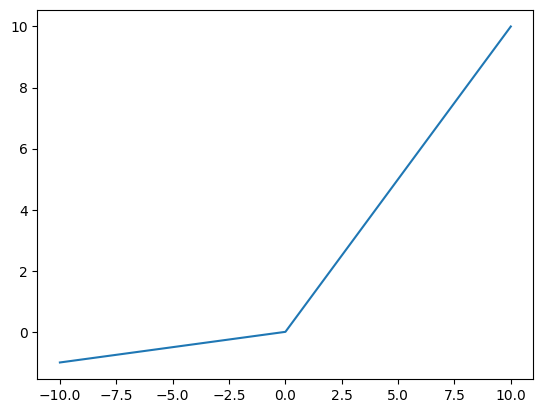

In [15]:
l = torch.linspace(-10, 10, 10000)
n = torch.nn.LeakyReLU(0.1)

plt.plot(l.numpy(), n(l).numpy())

In [21]:
def get_sinusoidal_embeddings(max_steps, time_embedding_dim, n=10000.0):
    assert time_embedding_dim % 2 == 0, f'Sinusoidal positional embedding cannot apply to odd token embedding dim (got dim={time_embedding_dim})'

    T = max_steps
    d = time_embedding_dim #d_model=head_num*d_k, not d_q, d_k, d_v

    positions = torch.arange(0, T).unsqueeze_(1)
    embeddings = torch.zeros(T, d)

    denominators = torch.pow(n, 2*torch.arange(0, d//2)/d) # 10000^(2i/d_model), i is the index of embedding
    embeddings[:, 0::2] = torch.sin(positions/denominators) # sin(pos/10000^(2i/d_model))
    embeddings[:, 1::2] = torch.cos(positions/denominators) # cos(pos/10000^(2i/d_model))

    return embeddings

embs = get_sinusoidal_embeddings(300, 128)

In [24]:
from torch.nn import Embedding

emb = Embedding(300, 128)
emb.weight = embs

TypeError: cannot assign 'torch.FloatTensor' as parameter 'weight' (torch.nn.Parameter or None expected)